In [507]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import cv2

## Read Images

In [508]:
width  = 150
height = 150

In [509]:

name = os.listdir("training-data")
def get_label(idx):
    return name[idx]

In [510]:
# mean_faces = []

def read_images(folder):
    outer = os.listdir(folder)
    Images = []
    Labels = []
    for idx, name in enumerate(outer):
        cur = os.path.join(folder, name)
        for imgfile in os.listdir(cur):
            
            img = os.path.join(folder, name, imgfile)
            img = cv2.imread(img)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (width, height))
            img = np.array(img, dtype=np.float64).flatten()
            Images.append(img)
            Labels.append(idx)
    return Images, Labels

In [511]:
train_image_names, train_label = read_images('training-data')
len(train_image_names)

66

In [512]:
test_image_names, test_label = read_images('testing-data')
len(test_image_names)

27

In [513]:
print('Train Images:')
training_tensor  = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)
for i in range(len(train_image_names)):
    img = train_image_names[i]
    
    training_tensor[i,:] = np.array(img, dtype=np.float64).flatten()
#     plt.subplot(2, 4,1+i)
#     plt.imshow(img.reshape(height, width), cmap='gray')
#     plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
# plt.show()

print('Test Images:')
# test_image_names = dataset_dir#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = test_image_names[i]
    testing_tensor[i,:] = np.array(img, dtype=np.float64).flatten()
#     plt.subplot(3,6,1+i)
# #     plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
#     plt.imshow(img.reshape(width, height), cmap='gray')
#     plt.subplots_adjust(right=1.2, top=1.2)
# #     plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
# plt.show()

Train Images:
Test Images:


In [514]:
training_tensor.shape

(66, 22500)

## Mean face

[255. 255. 255. ...  20.  18.  21.]
[254. 254. 253. ...  16.  16.  16.]
[253. 252. 253. ...  16.  16.  15.]
[244. 246. 245. ...  13.  14.  15.]
[248. 249. 248. ...  20.  21.  24.]
[244. 244. 244. ...   9.   8.  10.]
[248. 249. 248. ...  20.  21.  24.]
[249. 250. 250. ...  24.  26.  28.]
[254. 253. 253. ...  19.  19.  19.]
[238. 238. 240. ...  50.  52.  64.]
[240. 239. 239. ...  96. 102.  92.]
[243. 244. 241. ...  69.  69.  48.]
[243. 240. 243. ...  48.  52.  38.]
[244. 242. 244. ...  42.  26.  28.]
[242. 241. 241. ...  41.  45.  54.]
[236. 236. 236. ...  39.  34.  42.]
[242. 243. 244. ...  67.  52.  36.]
[236. 236. 235. ...  27.  28.  29.]
[164. 189. 169. ... 168. 181. 211.]
[173. 157. 174. ... 137. 152. 164.]
[162. 183. 154. ... 166. 195. 203.]
[155. 168. 156. ... 193. 186. 180.]
[167. 143. 145. ... 117. 150.  94.]
[164. 187. 170. ... 167. 180. 210.]
[164. 187. 170. ... 167. 180. 210.]
[161. 186. 165. ... 163. 177. 208.]
[253. 254. 254. ... 117. 154. 132.]
[254. 254. 254. ... 137. 158

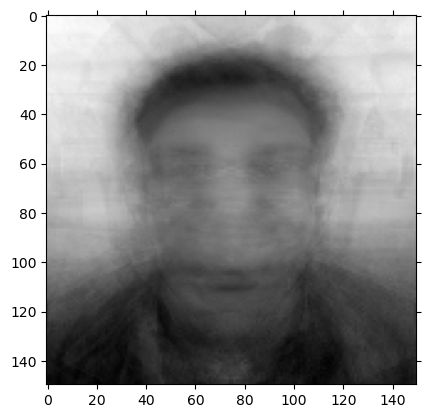

In [515]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)
    print(i)
#     plt.imshow(training_tensor[i].reshape(height, wisth))
print(mean_face.shape)
mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()

plt.imshow(mean_face.reshape(width, height), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Normalised faces

In [516]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

### Display normalised faces

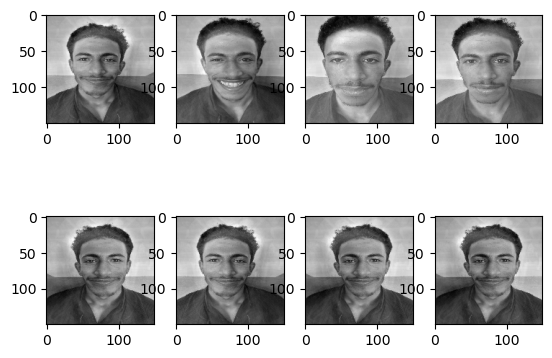

In [517]:
for i in range(8):
    img = normalised_training_tensor[i].reshape(width, height)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
plt.show()

In [518]:
normalised_training_tensor.shape

(66, 22500)

## Covariance matrix

In [519]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,66.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 36.76720681  22.19638601  11.29172064 ... -13.27527879  -6.03785428
  -13.10239194]
 [ 22.19638601  37.28091217  22.15693957 ...  -7.22428496  -1.41823888
   -7.15535738]
 [ 11.29172064  22.15693957  41.47932144 ...  -3.7460446    5.16889241
   -3.6881326 ]
 ...
 [-13.27527879  -7.22428496  -3.7460446  ...  30.10990394   8.02452006
   29.57573066]
 [ -6.03785428  -1.41823888   5.16889241 ...   8.02452006  30.04275896
    8.09078822]
 [-13.10239194  -7.15535738  -3.6881326  ...  29.57573066   8.09078822
   29.10445112]]


In [520]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.18320939 -0.0015445  -0.12323118 ...  0.10722244  0.00627828
  -0.0133041 ]
 [-0.13038195  0.13696696 -0.20177297 ...  0.10722244  0.00627828
  -0.0133041 ]
 [-0.07744825  0.16703417 -0.14202218 ...  0.10722244  0.00627828
  -0.0133041 ]
 ...
 [ 0.1241332   0.05062601 -0.10378095 ...  0.10722244  0.00627828
  -0.0133041 ]
 [ 0.04898915  0.19200267  0.05280559 ...  0.10722244  0.00627828
  -0.0133041 ]
 [ 0.12242313  0.05120947 -0.10025725 ...  0.10722244  0.00627828
  -0.0133041 ]]

Eigenvalues of Cov(X): 
[ 6.77672962e+02  2.71185281e+02  1.97403076e+02  1.94274878e+02
  1.41847574e+02  1.12889116e+02  9.46538221e+01  6.20976762e+01
  5.84231752e+01  5.68857094e+01  4.12343026e+01  3.46423118e+01
  2.91103431e+01  2.48072851e+01  2.39524893e+01  2.21645228e+01
  2.04692263e+01  2.06006524e+01  1.85829513e+01  1.77644202e+01
  1.60206270e+01  1.47993546e+01  1.39309889e+01  1.29878416e+01
  1.20822124e+01  1.18851446e+01  1.06382305e+01  9.24355767e+00
  8

In [521]:
cov_matrix.shape

(66, 66)

In [522]:
def calculate_component():
    no_c = 0
    cur_eig = 0
    for i in range(len(eigenvalues)):
        cur_eig += eigenvalues[i] / sum(eigenvalues)
        no_c += 1
        if cur_eig >= .95:
            break
    return no_c

In [523]:
no_c  = calculate_component()
no_c

26

## Choose the necessary no.of principle components:

In [524]:
reduced_data = np.array(eigenvectors[:no_c]).transpose()
reduced_data.shape

(66, 26)

Now we try to find the projected data. This will form the eigen space.

In [525]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()
proj_data.shape

(26, 22500)

## Plot eigen faces

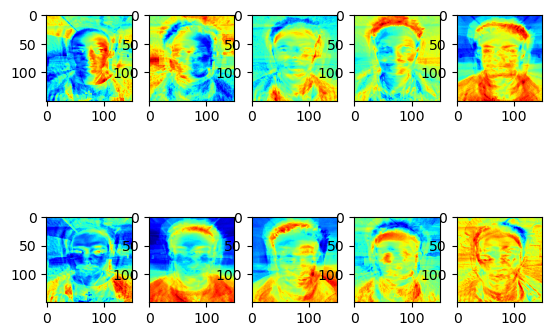

In [537]:
for i in range(10):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,5,1+i)
    plt.imshow(img, cmap='jet')
plt.show()

## Finding weights for each traning image

In [527]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w

array([[ 2.62466360e+03,  3.73974217e+07, -3.16741566e+07, ...,
         6.31561816e+07,  4.66911208e+07,  9.58761226e+07],
       [-2.56686697e+07,  2.84784358e+07, -2.26533840e+06, ...,
         2.58015442e+07,  1.91512921e+07,  2.96005766e+07],
       [-4.24289301e+07,  1.71386550e+07,  6.42709587e+06, ...,
         8.14859053e+06,  8.77279971e+06, -1.04233688e+07],
       ...,
       [-4.93887721e+07, -2.94827937e+07,  6.94348143e+07, ...,
        -6.13228804e+07, -3.70042702e+07, -1.14931160e+08],
       [-5.53987132e+07, -7.60402507e+06,  3.16512488e+07, ...,
        -3.52756251e+07, -3.17835878e+07, -8.05785034e+07],
       [-2.25439324e+07, -2.65899814e+07,  4.91736250e+07, ...,
        -4.91414799e+07, -3.40364331e+07, -7.50348533e+07]])

## Now we recognise unknown face!

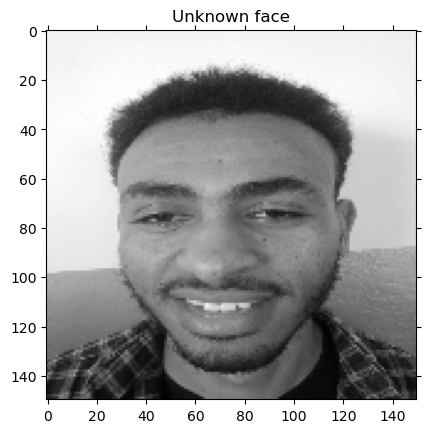

In [528]:
unknown_face = cv2.imread('testing-data/abrish/9.jpg')
unknown_face = cv2.cvtColor(unknown_face, cv2.COLOR_BGR2GRAY)
unknown_face = cv2.resize(unknown_face, (width, height))
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Normalise unknown face

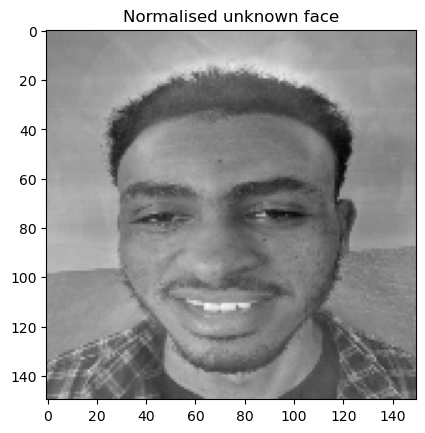

In [529]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
# plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Wieghts of uknown face

Projecting the normalized vector onto the eigenspace, to find out the weights:

In [530]:
w_unknown = np.dot(proj_data, normalised_uface_vector)
w_unknown

array([ 3.96578109e+07,  2.54131063e+07, -6.00688005e+07,  2.31096592e+07,
       -4.79354014e+07, -1.32244518e+07, -1.20924144e+08, -7.31411165e+07,
       -5.05371729e+07, -1.40533067e+07,  6.49242203e+07,  2.13514709e+06,
        4.32433779e+07,  2.92478789e+07,  9.82816465e+06,  1.02372699e+07,
        1.01807916e+08,  6.47014112e+07, -5.09765102e+07, -6.43945661e+07,
        3.18501211e+07,  1.06670181e+08,  5.02052913e+07,  4.57417338e+07,
        2.49042035e+07,  9.64593414e+07])

In [531]:
def pridict(norm):
    norm = list(norm)
    idx = 0
    dist = float('inf')
    for i in range(len(norm)):
        if norm[i] < dist:
            dist = norm[i]
            idx = i
    return get_label(train_label[idx])

Finding the $min|W - W_{unknown}|$

In [532]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
pridict(norms)

'abrish'

## Reconizing all test images

In [535]:
def recongnizeall():
    num_images   = 0
    correct_pred = 0
    for idx, img in enumerate(testing_tensor):
        img = np.subtract(img,mean_face)
        w_unknown = np.dot(proj_data, img)
        diff  = w - w_unknown
        norms = np.linalg.norm(diff, axis=1)
        if pridict(norms) == get_label(test_label[idx]):
            correct_pred += 1
        num_images += 1
    print("accurancy", correct_pred * 100/num_images)

In [536]:
recongnizeall()

accurancy 85.18518518518519
